In [ ]:
# source : https://scipython.com/blog/quadtrees-2-implementation-in-python/
import numpy as np
import matplotlib.pyplot as plt
from scripts.quadtree import Point, Rect, QuadTree
from matplotlib import gridspec
from PIL import Image

DPI = 72
np.random.seed(60)

width, height = 600, 400

N = 500
coords = np.random.randn(N, 2) * height/3 + (width/2, height/2)
points = [Point(*coord) for coord in coords]

domain = Rect(width/2, height/2, width, height)
qtree = QuadTree(domain, 3)
for point in points:
    qtree.insert(point)

print('Number of points in the domain =', len(qtree))

fig = plt.figure(figsize=(700/DPI, 500/DPI), dpi=DPI)
ax = plt.subplot()
ax.set_xlim(0, width)
ax.set_ylim(0, height)
qtree.draw(ax)

ax.scatter([p.x for p in points], [p.y for p in points], s=4)
ax.set_xticks([])
ax.set_yticks([])

region = Rect(140, 190, 150, 150)
found_points = []
qtree.query(region, found_points)
print('Number of found points =', len(found_points))

ax.scatter([p.x for p in found_points], [p.y for p in found_points],
           facecolors='none', edgecolors='r', s=32)

region.draw(ax, c='r')

ax.invert_yaxis()
plt.tight_layout()
plt.savefig('search-quadtree.png', DPI=72)
plt.show()


In [30]:
img = Image.open(r"Im108_0.jpg")

data = np.asarray(img.crop((0,0,1944,1944)))

width = 1944
height = 1944

domain = Rect(width/2, height/2, width, height)

qtree = QuadTree(domain, 3)
for i in np.arange(188):
    for j in np.arange(188):
        qtree.insert(Point(i, j, payload=data[i,j]))

In [31]:
print('Number of points in the domain =', len(qtree))

Number of points in the domain = 35344


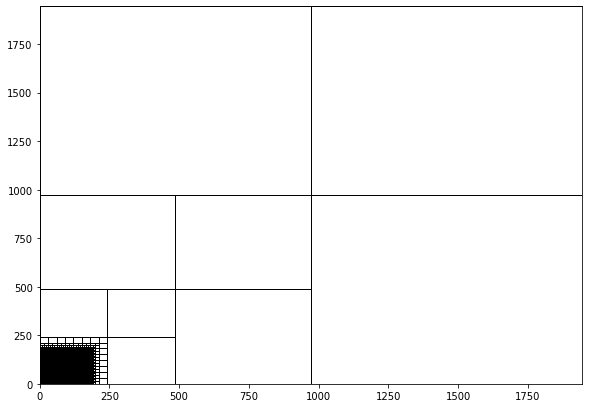

In [32]:
fig = plt.figure(figsize=(700/DPI, 500/DPI), dpi=DPI)
ax = plt.subplot()
ax.set_xlim(0, width)
ax.set_ylim(0, height)
qtree.draw(ax)